<a href="https://colab.research.google.com/github/Manthanm9/Flipkart-Exploratory-Data-Analysis/blob/main/Flipkart_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  <h1 style="text-align: center; font-weight: bold;">Flipkart Exploratory Data Analysis</h1>


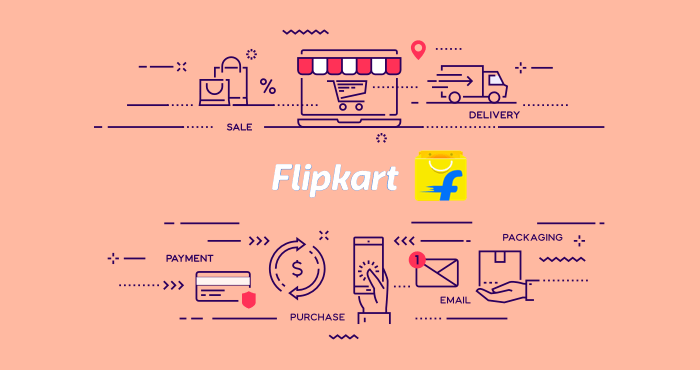

Importing Depedencies

In [86]:
import pandas as pd
import numpy as np
import ast
import plotly.express as px
from plotly import graph_objects as go

In [87]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


Loading Dataset

In [88]:
df=pd.read_csv("/content/gdrive/My Drive/Projects/Datasets/flipkart-ecom.csv")
df.head()


,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


Data Preprocessing

In [89]:
df.isnull().sum()

uniq_id                       0
crawl_timestamp               0
product_url                   0
product_name                  0
product_category_tree         0
pid                           0
retail_price                 78
discounted_price             78
image                         3
is_FK_Advantage_product       0
description                   2
product_rating                0
overall_rating                0
brand                      5864
product_specifications       14
dtype: int64

In [90]:
df["retail_price"].fillna(df["retail_price"].median(), inplace = True)
df["discounted_price"].fillna(df["discounted_price"].median(), inplace = True)

In [91]:
# Calculating Discount Percentage
x = df["retail_price"]-df["discounted_price"]
y = (x/df['retail_price'])*100
df['discount_percentage'] = y

In [92]:
 # Breaking down "crawl_timestamp" column in to Date and time
 df['timestamp']=pd.to_datetime(df['crawl_timestamp'])
 df['time']=df['timestamp'].apply(lambda x : x.time)
 df['date']=df['timestamp'].apply(lambda x : x.date)
 df.drop(['crawl_timestamp'], axis = 1, inplace = True)
 #df['main_category'] = df['product_category_tree'].apply(lambda x : x.split('>>')[0][2:len(x.split('>>')[0])])

In [93]:
# Create a function to extract the main category from the product_category_tree
def extract_main_category(x):
    return x.split('>>')[0][2:]
df['main_category'] = df['product_category_tree'].apply(extract_main_category)

In [94]:
df.head(4)

,uniq_id,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications,discount_percentage,timestamp,time,date,main_category
0,c2d766ca982eca8304150849735ffef9,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",62.062062,2016-03-25 22:59:23+00:00,22:59:23,2016-03-25,Clothing
1,7f7036a6d550aaa89d34c77bd39a5e48,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati...",29.576764,2016-03-25 22:59:23+00:00,22:59:23,2016-03-25,Furniture
2,f449ec65dcbc041b6ae5e6a32717d01b,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""...",50.050050,2016-03-25 22:59:23+00:00,22:59:23,2016-03-25,Footwear
3,0973b37acd0c664e3de26e97e5571454,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ...",61.802575,2016-03-25 22:59:23+00:00,22:59:23,2016-03-25,Clothing


# Data Analysis

**Top products and brands distribution**

In [95]:
#Top 10 main Products being purchased
n = 10

top_products = pd.DataFrame(df['main_category'].value_counts() [:n]).reset_index()
top_products.rename(columns ={"index":"Top Products", 'main_category': 'Total Count'}, inplace=True)

#Top 10 main brands being purchased

n = 10

top_brands=pd.DataFrame(df["brand"].value_counts()[:n]).reset_index()
top_brands.rename (columns = {"index": "Top Brands", 'brand': 'Total Count'}, inplace=True)

In [96]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

label1 = top_products['Top Products']
value1 = top_products['Total Count']
label2 = top_brands['Top Brands']
value2 = top_brands['Total Count']

# Create Subplots
fig = make_subplots(rows=1, cols=2, specs=[[{'type': 'domain'}, {'type': 'domain'}]])

fig.add_trace(go.Pie(labels=label1, values=value1, name='Top Products', pull=[0.3, 0, 0, 0]),
              1, 1)
fig.add_trace(go.Pie(labels=label2, values=value2, name='Top Brands', pull=[0.3, 0, 0, 0]),
              1, 2)

# Creating a donut pie-chart
fig.update_traces(hole=0.4, hoverinfo='label+percent+name')

fig.update_layout(
    title_text='Top products and brands distribution',
    annotations=[dict(text='Product', x=0.18, y=0.5, font_size=20, showarrow=False),
                 dict(text='Brand', x=0.82, y=0.5, font_size=20, showarrow=False)]
)

fig.show()


**Brands with High Discounts**

In [97]:
df_discount=df.query('discount_percentage > 90') #targeting brands giving high discounts
df_discount=df_discount.dropna () #dropping rows with NA values

df_discount["brand"].replace('FashBlush', 'Fash Blush', inplace=True) #handling spelling errors
max_discount=pd.DataFrame(df_discount.groupby('brand')[['discount_percentage']].mean().sort_values(by=['discount_percentage'],ascending=False).reset_index())

In [98]:
fig = px.bar(max_discount, x='brand', y='discount_percentage', color='brand',
             color_discrete_sequence=px.colors.qualitative.Plotly)
fig.show()

**5  Star rating**

In [100]:
total_prod = len(df['pid'])# Total products using 'pid' variable


total_ratings = len(df[df['product_rating'] != 'No rating available'])# Total rated products (products with ratings)


top_ratings = len(df[df['product_rating'] == '5'])# 5-star rated products


number = [total_prod, total_ratings, top_ratings] # Create a list to store the values for the funnel plot


# Create a DataFrame for the funnel plot data
df_funnel_1 = pd.DataFrame({
    "stage": ["Total Products", "Products with Ratings", "5-Star Rated Products"],
    "number": number
})

# Create the funnel plot
fig_funnel_1 = px.funnel(df_funnel_1, x='number', y='stage', title='Funnel Plot for Product Ratings')

fig_funnel_1.show()

**Ratingwise Count**

In [101]:
# Filter rows with product_rating equal to '5'
rating_5 = df.loc[df['product_rating'] == 5]

top_product_type = rating_5['main_category'].value_counts()

# Count the occurrences of each brand for top brands
top_brand_type = rating_5['brand'].value_counts()

# Top 5 products
df_top_product = pd.DataFrame(top_product_type[:5].reset_index())
df_top_product.rename(columns={'index': 'top_prod'}, inplace=True)

df_top_product.drop('main_category', inplace=True, axis=1)

# Top 5 brands
df_top_brand = pd.DataFrame(top_brand_type[:5].reset_index())
df_top_brand.rename(columns={'index': 'top_brands'}, inplace=True)

# Drop the 'brand' column as it's no longer needed
df_top_brand.drop('brand', inplace=True, axis=1)

# Concatenating the two tables
df_product_brand_rate5 = pd.concat([df_top_product, df_top_brand], axis=1)

df_product_brand_rate5.head()

,top_prod,top_brands


In [102]:
df.drop(df.index[df['product_rating'] == 'No rating available'], inplace=True)

ratings = pd.DataFrame(df['product_rating'].value_counts().reset_index())
ratings['index'] = ratings['index'].astype(float)

# Sorting the DataFrame by 'index' column in descending order
ratings.head().sort_values(by=['index'], ascending=[False])

ratings.rename(columns={'index': 'Ratings', 'product_rating': 'Counts'}, inplace=True)

# Plotting the result
data = ratings
x = ratings['Ratings']
y = ratings['Counts']

figdot2 = go.Figure()

figdot2.add_trace(go.Scatter(
        x=x,
        y=y,
        marker=dict(color="crimson", size=12),
        mode="markers",
        name="ratings",
    )
)

figdot2.update_layout(title="Ratings v/s Count",
                      xaxis_title="Ratings",
                      yaxis_title="Count")

figdot2.update_xaxes(showline=True, linewidth=1, linecolor='black', mirror=True)
figdot2.update_yaxes(showline=True, linewidth=1, linecolor='black', mirror=True)

figdot2.show()

**Variation in Discount through-out a Year**

In [103]:
df_date_retail = pd.DataFrame(df.groupby("date")[["retail_price"]].mean().reset_index())
df_date_discount = pd.DataFrame(df.groupby("date")[["discounted_price"]].mean().reset_index())

df_date_price = pd.concat([df_date_retail, df_date_discount], axis=1)
df_date_price = df_date_price.loc[:, ~df_date_price.columns.duplicated()]  # Remove duplicate columns

# Plot
x = df_date_price['date']
y1 = df_date_price['retail_price']
y2 = df_date_price['discounted_price']

fig_area2 = go.Figure()

fig_area2.add_trace(
    go.Scatter(x=x, y=y1, fill='tozeroy', name='retail price', line=dict(width=0.5, color='crimson'))
)  # Fill down to xaxis

fig_area2.add_trace(
    go.Scatter(x=x, y=y2, fill='tozeroy', name='discount price', line=dict(width=0.5, color='darkslategray'))
)  # Fill to trace y

fig_area2.update_layout(
    xaxis_title="Dates",
    yaxis_title="Price (in 1000s)",
    plot_bgcolor='white',
)

fig_area2.update_xaxes(showline=True, linewidth=1, linecolor='black', mirror=True)
fig_area2.update_yaxes(showline=True, linewidth=1, linecolor='black', mirror=True)

fig_area2.show()

**User engagement pattern through-out the day**

In [104]:
scat2 = px.scatter(x=df['time'].sort_values(ascending=True), y=df['product_url'])
scat2.update_layout(
    title_text='No. of clicks vs Time',    # Title of plot
    xaxis_title_text='Time',               # X-axis label
    yaxis_title_text='No. of Clicks',      # Y-axis label
)
scat2.update_yaxes(showticklabels=False)
scat2.update_xaxes(showline=True, linewidth=1, linecolor='black', mirror=True)
scat2.update_yaxes(showline=True, linewidth=1, linecolor='black', mirror=True)

scat2.show()